In [1]:
import numpy as np
import tensorflow as tf

In [94]:
data_dir = 'chest_xray_dataset/train'
batch_size = 32
img_height = 80
img_width = 80

In [95]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.1,
    subset = 'training',
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 5216 files belonging to 2 classes.
Using 4695 files for training.


In [96]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.1,
    subset = 'validation',
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 5216 files belonging to 2 classes.
Using 521 files for validation.


In [97]:
class_names = train_ds.class_names
class_names

['NORMAL', 'PNEUMONIA']

In [98]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [99]:
data_augmentation = tf.keras.Sequential(
        [
            tf.keras.layers.RandomFlip("horizontal",
                            input_shape=(img_height,
                                        img_width,
                                        3)),
            tf.keras.layers.RandomRotation(0.1),
            tf.keras.layers.RandomZoom(0.1),
        ]
        )

In [100]:
num_classes = len(class_names)

model = tf.keras.Sequential([
  data_augmentation,
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [101]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics=['accuracy'])

In [102]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
147/147 [==============================] - 23s 24ms/step - loss: 0.4203 - accuracy: 0.8138 - val_loss: 0.2991 - val_accuracy: 0.8560
Epoch 2/10
147/147 [==============================] - 1s 9ms/step - loss: 0.2421 - accuracy: 0.8944 - val_loss: 0.1567 - val_accuracy: 0.9367
Epoch 3/10
147/147 [==============================] - 1s 8ms/step - loss: 0.1883 - accuracy: 0.9206 - val_loss: 0.1803 - val_accuracy: 0.9194
Epoch 4/10
147/147 [==============================] - 1s 8ms/step - loss: 0.1838 - accuracy: 0.9250 - val_loss: 0.3787 - val_accuracy: 0.8292
Epoch 5/10
147/147 [==============================] - 1s 8ms/step - loss: 0.1640 - accuracy: 0.9378 - val_loss: 0.1429 - val_accuracy: 0.9424
Epoch 6/10
147/147 [==============================] - 1s 9ms/step - loss: 0.1521 - accuracy: 0.9384 - val_loss: 0.2711 - val_accuracy: 0.8791
Epoch 7/10
147/147 [==============================] - 2s 10ms/step - loss: 0.1356 - accuracy: 0.9463 - val_loss: 0.0977 - val_accuracy: 0.9655
Epo

In [103]:
model.save('model.h5')

[96.9  3.1]
 ['NORMAL', 'PNEUMONIA']
Prediction:  NORMAL 96.89999222755432%


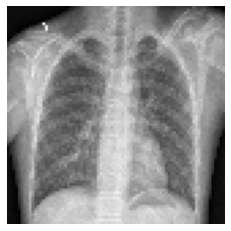

In [104]:
import matplotlib.pyplot as plt

model = tf.keras.models.load_model('model.h5')

classes = ['NORMAL', 'PNEUMONIA']

path = 'chest_xray_dataset/test/NORMAL_IM-0011-0001-0001.jpeg'

img = tf.keras.preprocessing.image.load_img(path, target_size=(img_height, img_width)) 
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)

plt.imshow(img)
plt.axis('off')
print(f"{(predictions[0]*100).round(2)}\n", classes)
print("Prediction: ", classes[np.argmax(predictions)], f"{predictions[0][np.argmax(predictions)]*100}%")

In [105]:
!python eval.py

2022-07-18 18:23:27.152009: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
You got 95.05% accuracy
